<h1 align="center"> Circuit Analysis Using Sympy</h1>
<h2 align="center"> Assignment 7</h2>
<h3 align="center"> M V A Suhas kumar,EE17B109</h3>
<h4 align="center">March 16,2019 </h4>

# Introduction
In this assignment, we use Sympy to analytically solve a matrix equation governing an analog circuit. We look at two circuits, an active low pass filter and an active high pass filter. We create matrices using node equations for the circuits in sympy, and then solve the equations analytically. We then convert the resulting sympy solution into a numpy function which can be called. We then use the signals toolbox we studied in the last assignment to understand the responses of the two circuits to various inputs.

Importing required packages

In [1]:

from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import *
from IPython.display import *




# Low pass Filter


![Circuit1](circuit1.png)


where G  =1.586 and R1 = R2 = 10kΩ and C1=C2=10pF. This gives a 3dB Butter-worth filter with cutoff frequency of 1/2πMHz.

Circuit Equations are as follows:
$$V_{m}=\frac{V_{o}}{G}$$                                         
$$ V_{p} =V_{1} \frac{1}{1+s R_{2}C_{2}}$$
$$ V_{o} = G(V_{p} - V_{m})$$
$$\frac{V_{i}-V_{1}}{R_{1}} + \frac{V_{p}-V_{1}}{R_{2}} + s C_{1}(V_{0}-V_{1}) = 0$$
Solving the above equations with approxmtion gives

$$ V_{o} \approx \frac{V_{i}}{s R_{1} C_{1}}$$

We would like to solve this in Python and also get (and plot) the exact result.  For this we need the sympy module.

To solve the equtions exactly we use matrix method of solving:


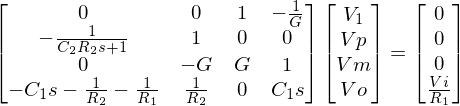

In [2]:
init_printing()
R1,R2,C1,C2,G = symbols("R1 R2 C1 C2 G")
V1,Vp,Vm,Vo,Vi = symbols("V1 Vp Vm Vo Vi")
s = symbols("s")
A = Matrix([[0,0,1,-1/G],
            [-1/(1+s*R2*C2),1,0,0],
            [0,-G,G,1],
          [-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
M = Matrix([V1,Vp,Vm,Vo])
b = Matrix([0,0,0,Vi/R1])
display(Eq(MatMul(A,M),b))

Solving the above matrix yield exact result

Function defining low pass filter:

In [3]:
def lowpass(R1=10**4,R2=10**4,C1=10**-11,C2=10**-11,G=1.586,Vi=1):
    s=symbols("s")
    A=Matrix([[0,0,1,-1/G],
              [-1/(1+s*R2*C2),1,0,0],
              [0,-G,G,1],
              [-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b=Matrix([0,0,0,Vi/R1])
    V = A.inv()*b
    return(A,b,V)
    

Function which can take input in laplace domain or time domain and give the output of low pass filter:

In [4]:
def low_pass_output(laplace_fn = None,time_fn=None,t=np.linspace(0,1e-5,1e5),C=10**-11):
    A,b,V = lowpass(C1=C,C2=C)
    v_low_pass = V[-1]
    temp = expand(simplify(v_low_pass))
    n,d = fraction(temp)
    n,d = Poly(n,s),Poly(d,s)
    num,den = n.all_coeffs(),d.all_coeffs()
    H_v_low_pass = sp.lti([-float(f) for f in num],[float(f) for f in den])
    if laplace_fn !=None:
        temp = expand(simplify(laplace_fn))
        n,d = fraction(temp)
        n,d = Poly(n,s),Poly(d,s)
        num,den = n.all_coeffs(),d.all_coeffs()
        lap = sp.lti([float(f) for f in num],[float(f) for f in den])
        t,u = sp.impulse(lap,None,t)
    else:
        u = time_fn
    t,V_out,svec = sp.lsim(H_v_low_pass,u,t)
    return (t,V_out)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


# High pass filter

![High pass filter](high.png)

values you can use are R1=R3=10kΩ, C1=C2=1nF, and G=1.586

Circuit Equations are as follows:
$$V_{n}=\frac{V_{o}}{G}$$                                         
$$ V_{p} =V_{1} \frac{s R_{3}C_{2}}{1+s R_{3}C_{2}}$$
$$ V_{o} = G(V_{p} - V_{n})$$
$$(V_{1}-V_{i})sC_{1} + \frac{(V_{1}-V_{o})}{R_{1}} + (V_{i}-V_{p})sC_{2} = 0 $$

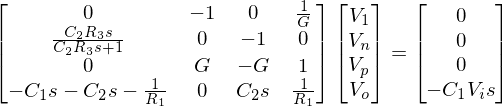

In [5]:
R1, R3, C1, C2, G, Vi = symbols('R_1 R_3 C_1 C_2 G V_i')
V1,Vn,Vp,Vo = symbols('V_1 V_n V_p V_o')
x=Matrix([V1,Vn,Vp,Vo])

A=Matrix([[0,-1,0,1/G],
        [s*C2*R3/(s*C2*R3+1),0,-1,0],
        [0,G,-G,1],
        [-s*C2-1/R1-s*C1,0,s*C2,1/R1]])

b=Matrix([0,0,0,-Vi*s*C1])
init_printing
display(Eq(MatMul(A,x),b))

Function defining high pass filter:

In [6]:
def highpass(R1=10**4,R3=10**4,C1=10**-9,C2=10**-9,G=1.586,Vi=1):
    s= symbols("s")
    A=Matrix([[0,-1,0,1/G],
        [s*C2*R3/(s*C2*R3+1),0,-1,0],
        [0,G,-G,1],
        [-s*C2-1/R1-s*C1,0,s*C2,1/R1]])

    b=Matrix([0,0,0,-Vi*s*C1])
    V =A.inv() * b
    return (A,b,V)
    

Function which can take input in laplace domain or time domain and give the output of high pass filter:

In [7]:

def high_pass_output(laplace_fn = None,time_fn=None,t=np.linspace(0,1e-4,1e5),C=10**-11):
    A,b,V = highpass(C1=C,C2=C)
    v_high_pass = V[-1]
    temp = expand(simplify(v_high_pass))
    n,d = fraction(temp)
    n,d = Poly(n,s),Poly(d,s)
    num,den = n.all_coeffs(),d.all_coeffs()
    H_v_high_pass = sp.lti([float(f) for f in num],[float(f) for f in den])
    if laplace_fn !=None:
        temp = expand(simplify(laplace_fn))
        n,d = fraction(temp)
        n,d = Poly(n,s),Poly(d,s)
        num,den = n.all_coeffs(),d.all_coeffs()
        lap = sp.lti([float(f) for f in num],[float(f) for f in den])
        t,u = sp.impulse(lap,None,t)
    else:
        u = time_fn
    t,V_out,svec = sp.lsim(H_v_high_pass,u,t)
    return (t,V_out)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


# Question1

Step Response for low pass filter

In [8]:
t,V_low_step = low_pass_output(laplace_fn=1/s)

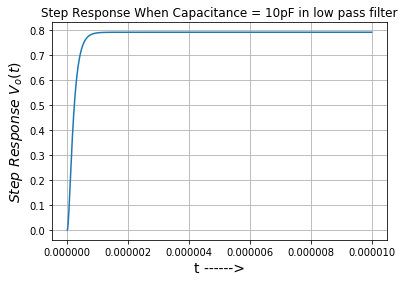

In [9]:
plt.plot(t,V_low_step)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$Step\ Response\ V_{o}(t)$",size=14)
plt.title("Step Response When Capacitance = 10pF in low pass filter")
plt.show()

Step response is starting from zero and reaching 0.793 at steady state.This is because DC gain oftransfer function  is 0.793.Initial value is 0 because AC gain of low pass filter is zero(impulse can be assumed as High frequency signal and we know low pass filter dosen't pass high frequency signal). 

# Question2

Finding Output when input signal is $$(sin(2000πt)+cos(2×106πt))u_{o}(t)$$

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


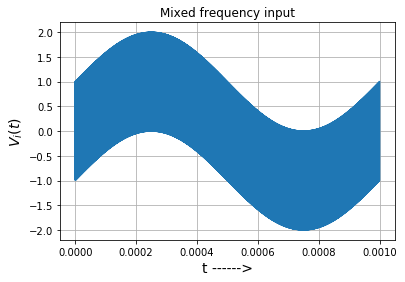

In [10]:
t = np.linspace(0,1e-3,1e5)
plt.plot(t,np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t))
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{i}(t)$",size=14)
plt.title("Mixed frequency input")
plt.show()

Band is high frequency wave and envolope is the low frequency wave

In [11]:

t = linspace(0,1e-5,1e5)
t,vout = low_pass_output(time_fn=np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t),t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


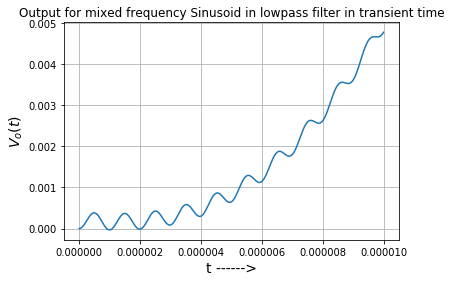

In [12]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for mixed frequency Sinusoid in lowpass filter in transient time")
plt.show()

From above we can clearly see that Output is superposition of High Amplitude low frequency wave and Low amplitude High frquency wave(Since Low pass filter attenuates the High frequencies) 

In [13]:

t = linspace(0,1e-5,1e5)
t,vout = high_pass_output(time_fn=np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t),t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


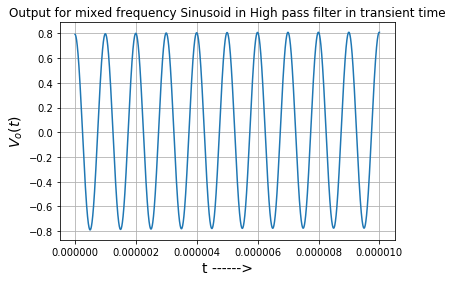

In [14]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for mixed frequency Sinusoid in High pass filter in transient time")
plt.show()

The plot which is appearing to be band(closely placed lines) is superposition of High Amplitude High frequency wave and Low amplitude Low frquency wave(Since High pass filter attenuates the Low frequencies) which inturn appears to be non distorted sine wave.

In [15]:

t = linspace(0,1e-3,1e5)
t,vout = low_pass_output(time_fn=np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t),t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


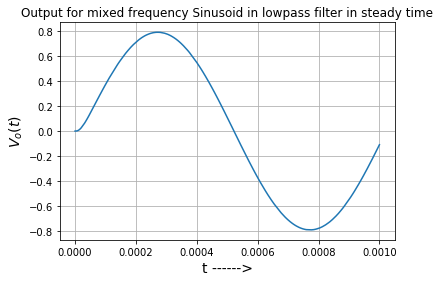

In [16]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for mixed frequency Sinusoid in lowpass filter in steady time")
plt.show()

From graph we can see frequency is close to 1000Hz(which is low frquency input)

In [17]:

t = linspace(0,1e-4,1e5)
t,vout = high_pass_output(time_fn=np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t),t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


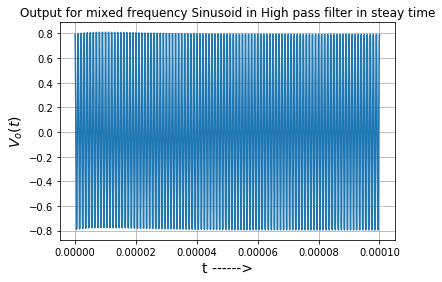

In [18]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for mixed frequency Sinusoid in High pass filter in steay time")
plt.show()

From graph we can see frequency is close to 1000KHz(which is high frquency input)

# Question 3,4

Damped Sinusoid -----> $exp(-300t)sin(10^{6}t)$

In [19]:

t = linspace(0,1e-3,1e6)
f = np.exp(-3000*t) * np.sin(10**6 *t)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


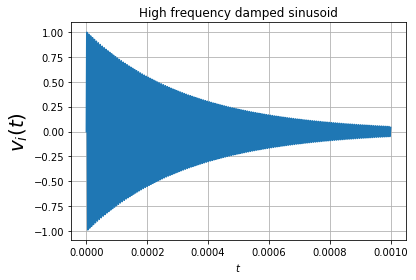

In [20]:
plt.title("High frequency damped sinusoid")
plt.xlabel("$t$")
plt.ylabel("$v_i(t)$",size=20)
plt.plot(t,f)
plt.grid()
plt.show()

In [21]:

t = linspace(0,1e-3,1e6)
t,vout = high_pass_output(time_fn=f,t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


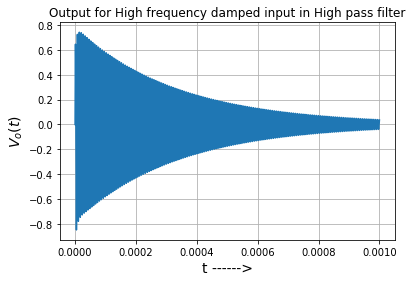

In [22]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for High frequency damped input in High pass filter")
plt.show()

From above graph we can clearly see that High pass filter passed high frequency sinusoid with out attenuating much.(Since property of high pass filter)

In [27]:

t = linspace(0,1e-3,1e6)
t,vout = low_pass_output(time_fn=f,t=t,C=10**-9)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


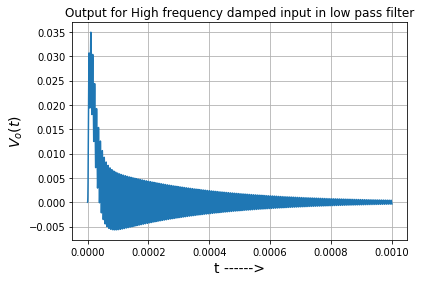

In [28]:
plt.plot(t,vout)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$V_{o}(t)$",size=14)
plt.title("Output for High frequency damped input in low pass filter")
plt.show()

From above graph Low pass filter quickly attenuated the High frequency Sinusoid and gives distorted Output

# Question 5

In [29]:
t,V_high_step = high_pass_output(laplace_fn=1/s,C=10**-9)

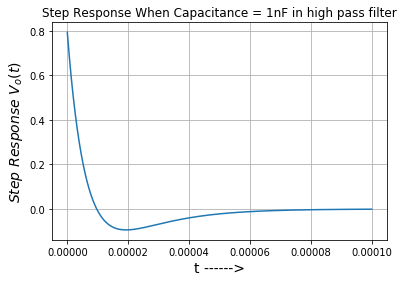

In [30]:
plt.plot(t,V_high_step)
plt.grid(True)
plt.xlabel("t ------>",size=14)
plt.ylabel(r"$Step\ Response\ V_{o}(t)$",size=14)
plt.title("Step Response When Capacitance = 1nF in high pass filter")
plt.show()

Step response here saturates at zero and this is because DC gain of High pass filter is 0. We can clearly see from graph that it starts from 0.793 and this because AC gain of transfer function  at high frequencies is 0.793(Step can assumed as infinite frequency signal and we know high pass filter only allows high frequency signals)

step response overshoots the steady state value of 0, reaches an
extremum, then settles back to 0, unlike the response of the low pass filter which steadily
approaches the steady state value with no extrema. This occurs because of the presence of
zeros at the origin in the transfer function of the high pass filter(which imply that the DC
gain is 0). Since the steady state value of the step response is 0, the total signed area under
the curve of the impulse response must also be 0. This means that the impulse response must
equal zero at one or more time instants. Since the impulse response is the derivative of the
step response, this therefore means that the step response must have at least one extremum.
This explains the behaviour of the step response of the high pass filter.

# Conclusions:

The low pass filter responds by letting the low frequency sinusoid pass through without
much additional attenuation. The output decays as the input also decays.

The high pass filter responds by quickly attenuating the input. Notice that the time scales
show that the high pass filter response is orders of magnitudes faster than the low pass
response. This is because the input frequency is below the cutoff frequency, so the output
goes to 0 very fast.

In conclusion, the sympy module has allowed us to analyse quite complicated circuits by
analytically solving their node equations. We then interpreted the solutions by plotting time
domain responses using the signals toolbox. Thus, sympy combined with the scipy.signal
module is a very useful toolbox for analyzing complicated systems like the active filters in
this assignment.